<a href="https://colab.research.google.com/github/zxzhang0428/DS110/blob/main/DS110_Final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS110 FINAL PROJECT
Marcus Hau, Yutong (Chris) Wu, Zixin (Alice) Zhang


# Package importing and Initial data set set-up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from os.path import join
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score


from scipy.stats import ttest_ind
from scipy.stats import pearsonr

pd.set_option('display.float_format', '{:.6f}'.format)


In [ ]:
data = pd.read_csv("California_Houses.csv")
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.000000,8.325200,41,880,129,322,126,37.880000,-122.230000,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.000000,8.301400,21,7099,1106,2401,1138,37.860000,-122.220000,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.000000,7.257400,52,1467,190,496,177,37.850000,-122.240000,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.000000,5.643100,52,1274,235,558,219,37.850000,-122.250000,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.000000,3.846200,52,1627,280,565,259,37.850000,-122.250000,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
# just an inital data clean to remove null data, there will be futher changes to data when the machine learning process starts.
data.dropna(inplace = True)

# Initial label visualisation

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

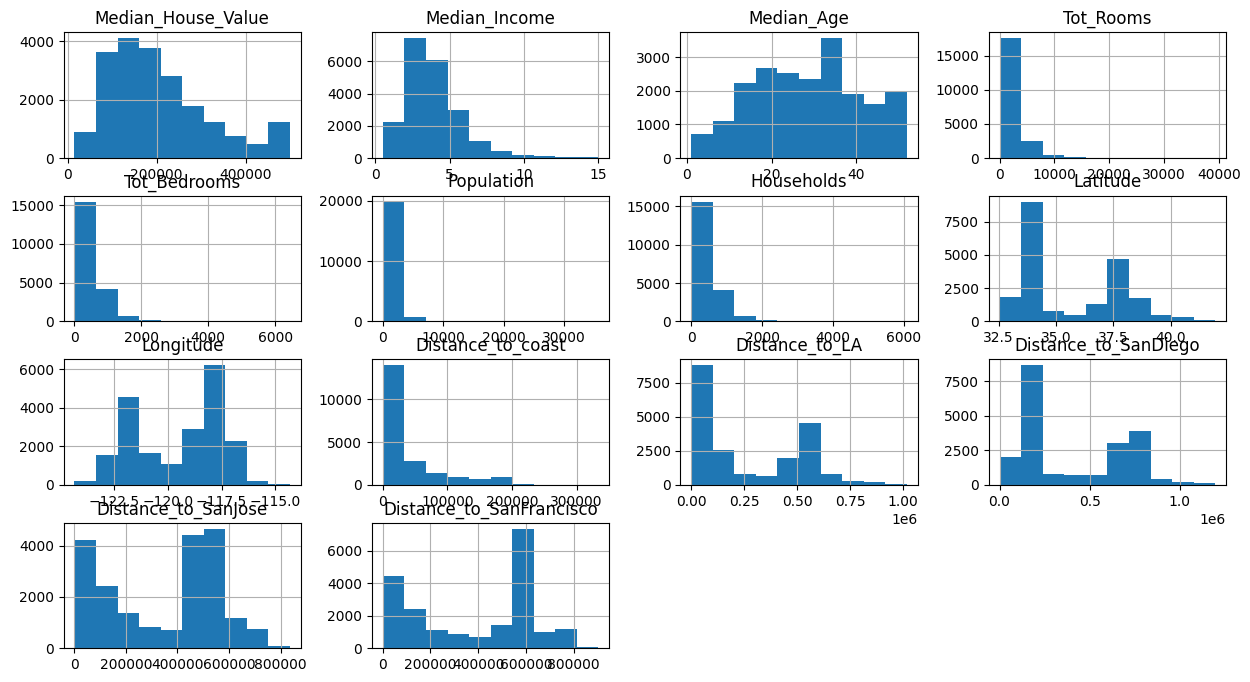

In [ ]:
data.hist(figsize = (15, 8))

# Visualisation 1. Seaborn Correlation Heatmap and Correlation bar chart with respect to median house value

<Axes: >

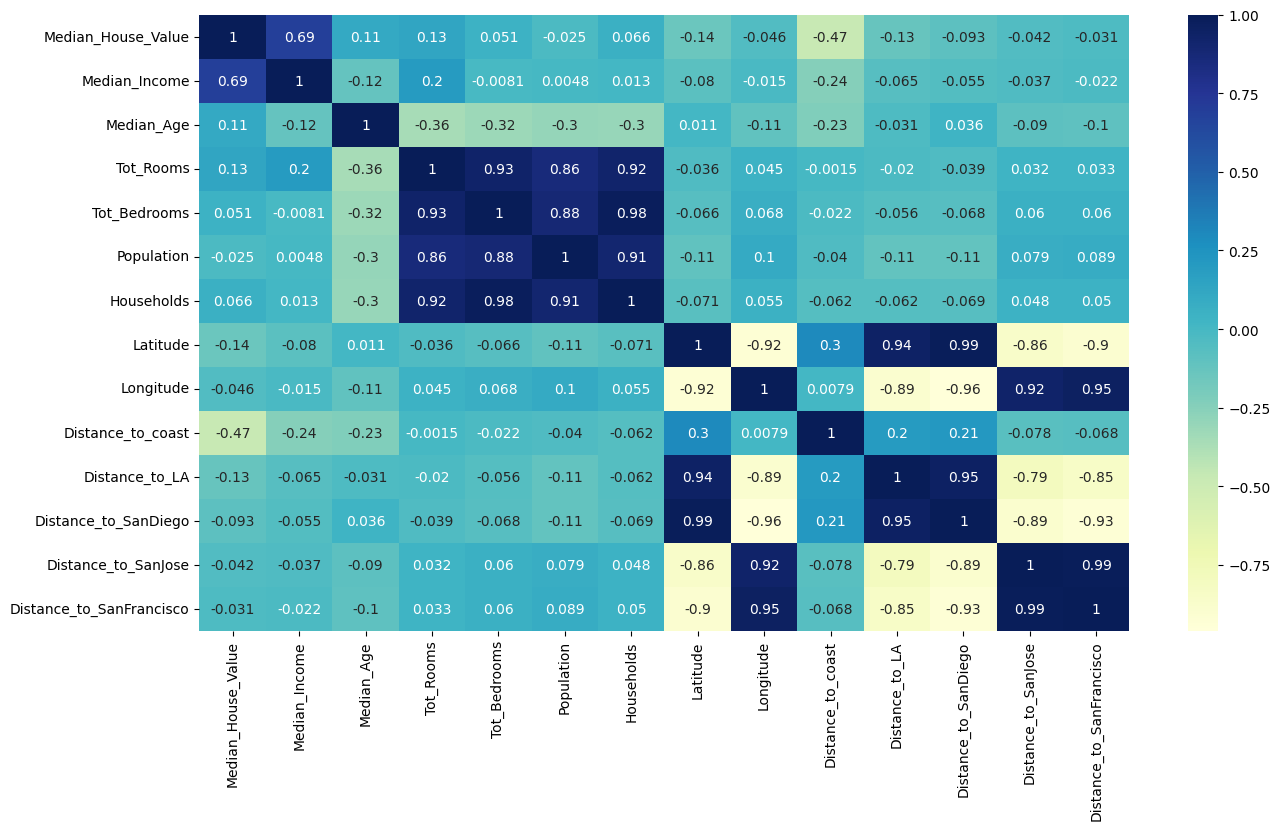

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')

Correlation heatmap with respect to the median house value


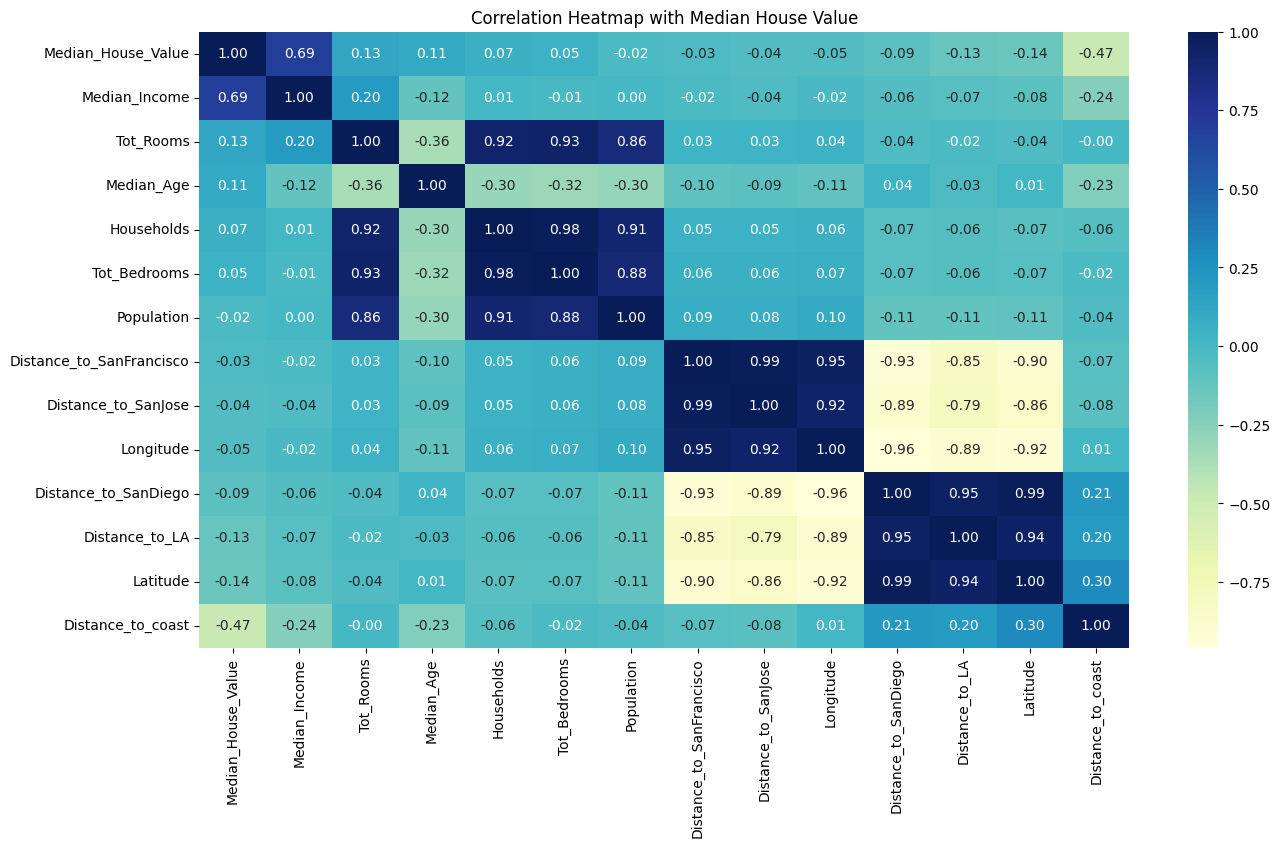

In [ ]:
correlation_matrix = data.corr()

# Sort the correlation values with respect to "Median_House_Value"
sorted_correlation = correlation_matrix['Median_House_Value'].sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.heatmap(data[sorted_correlation.index].corr(), annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Correlation Heatmap with Median House Value')
plt.show()

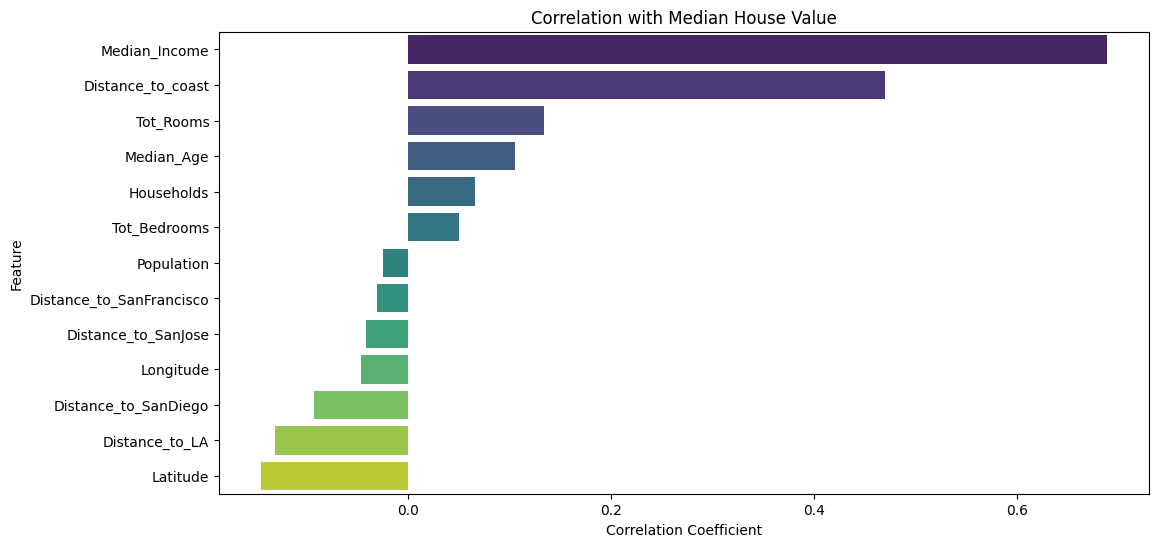

In [ ]:
df_bar = data.copy()

df_bar["Distance_to_coast"] = df_bar["Distance_to_coast"] * -1
# Calculate correlations
correlations = df_bar.corr()['Median_House_Value'].drop('Median_House_Value')

# Create a DataFrame for plotting
df_corr = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})
df_corr = df_corr.sort_values(by='Correlation', ascending=False)

# Plot the correlations using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Correlation', y='Feature', data=df_corr, palette='viridis')
plt.title('Correlation with Median House Value')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


# Visualization 2: Displaying the Latitude and Longitude of housing locations


Text(37.339, -121.895, ' San Jose')

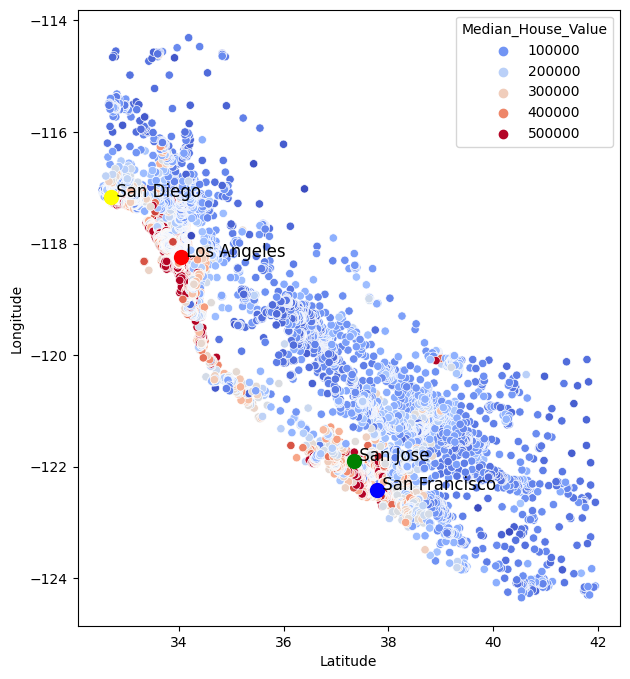

In [ ]:
plt.figure(figsize = (7, 8))
sns.scatterplot(x = 'Latitude', y = 'Longitude', data = data, hue = "Median_House_Value", palette = 'coolwarm')

la_coordinates = (34.0522, -118.2437)  # Los Angeles coordinates
sf_coordinates = (37.7749, -122.4194)  # San Francisco coordinates
sd_coordinates = (32.716, -117.165)  # San Diego coordinates
sj_coordinates = (37.339, -121.895)  # San Jose coordinates

# City point coordniates
plt.scatter(*la_coordinates, color='red', label='Los Angeles', s=100, marker='o')
plt.scatter(*sf_coordinates, color='blue', label='San Francisco', s=100, marker='o')
plt.scatter(*sd_coordinates, color='yellow', label='San Diego', s=100, marker='o')
plt.scatter(*sj_coordinates, color='green', label='San Jose', s=100, marker='o')

# City name labels
plt.text(la_coordinates[0], la_coordinates[1], ' Los Angeles', fontsize=12, ha='left')
plt.text(sf_coordinates[0], sf_coordinates[1], ' San Francisco', fontsize=12, ha='left')
plt.text(sd_coordinates[0], sd_coordinates[1], ' San Diego', fontsize=12, ha='left')
plt.text(sj_coordinates[0], sj_coordinates[1], ' San Jose', fontsize=12, ha='left')


# Pearson correlation test and Visualisation 3. Scatter plot of Median income of a housing district vs Median House value

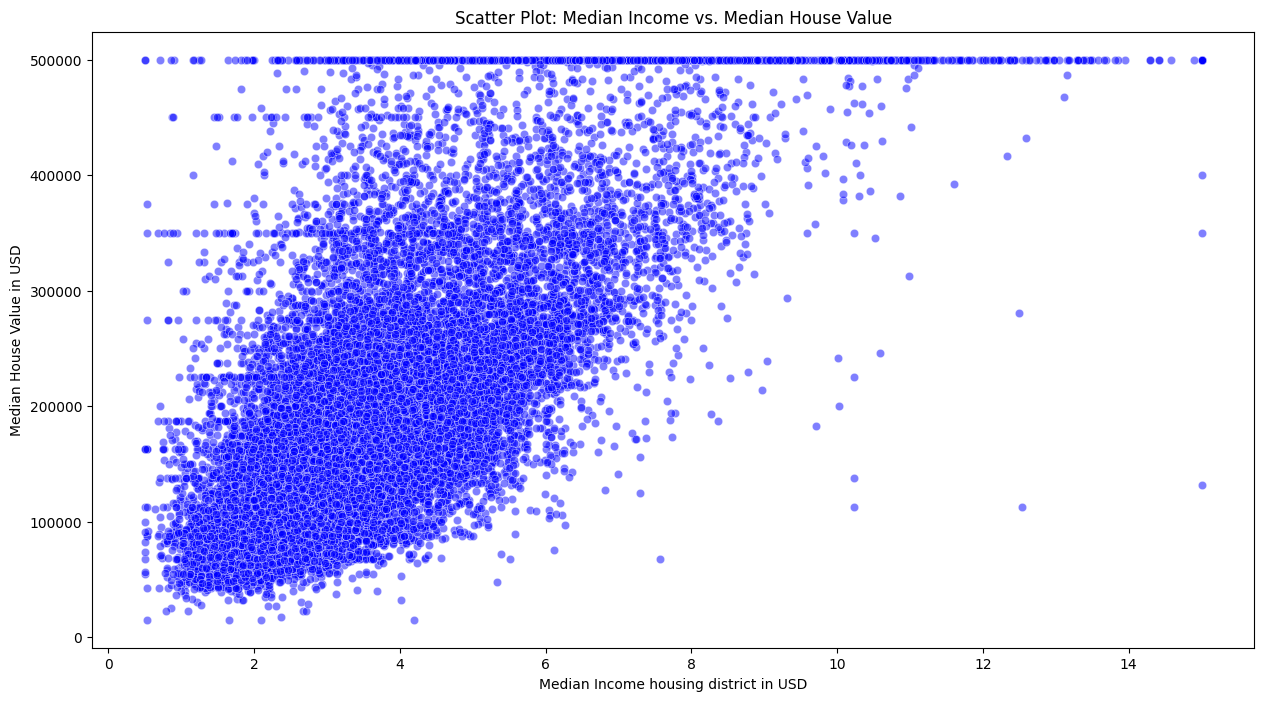

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Median_Income', y='Median_House_Value', data=data, color='blue', alpha=0.5)

plt.title('Scatter Plot: Median Income vs. Median House Value')
plt.xlabel('Median Income housing district in USD')
plt.ylabel('Median House Value in USD')

plt.show()

We can perform a pearson's correlation test to determine if there is signifiancec correlation between median housing price and the median income of that housing district.

In [ ]:
variable_a = data['Median_House_Value']
variable_b = data['Median_Income']

correlation_coefficient, p_value = pearsonr(variable_a, variable_b)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")


Pearson Correlation Coefficient: 0.6880752079585479


# T-test and Visualisation 4. Scatter plot of distance of a house to the California Coast vs Median House value

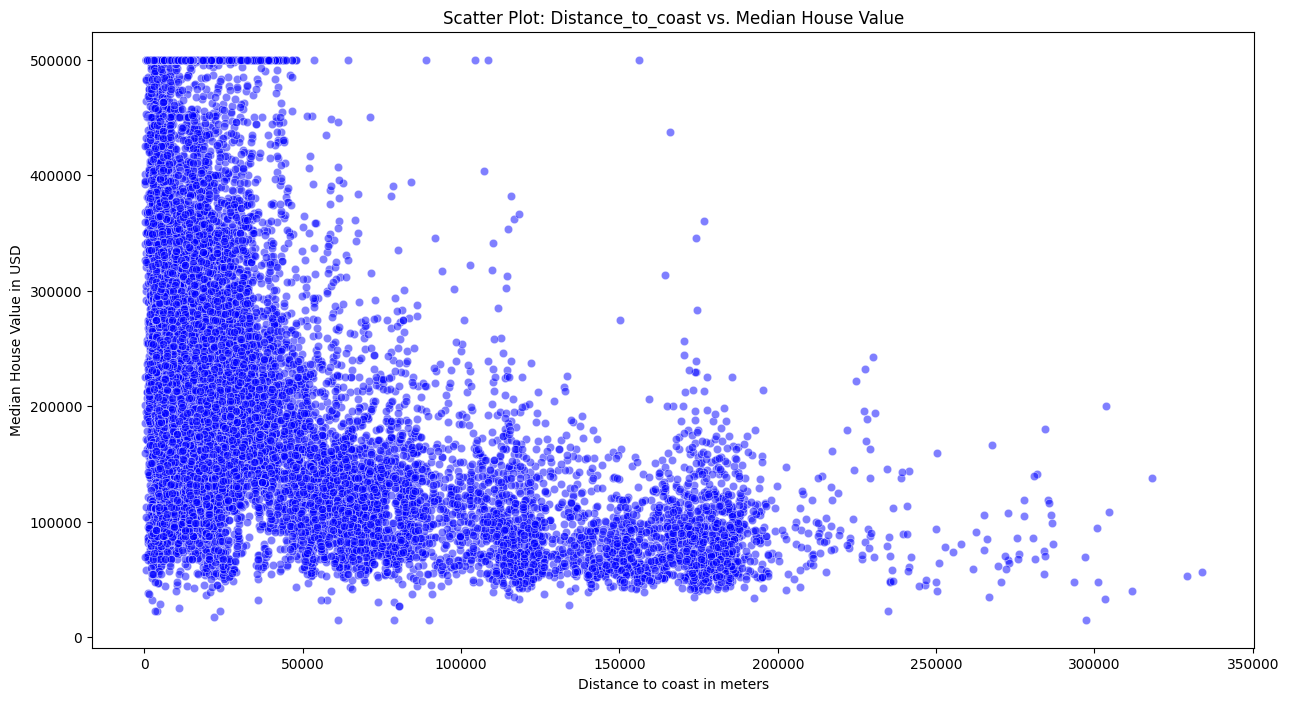

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Distance_to_coast', y='Median_House_Value', data=data, color='blue', alpha=0.5)

plt.title('Scatter Plot: Distance_to_coast vs. Median House Value')
plt.xlabel('Distance to coast in meters')
plt.ylabel('Median House Value in USD')

plt.show()

T-test to test if there is a significance between the distance to the coast and the median house value. To accomplish this we convert the distance to the coast into the approximate hours it would take to drive from the home to the coast
assuming the average highway speed in California is 105 km per hour. We understand there are certain limitations such as different highway configurations and not all of the road will be driven at highway speed but it gives a good idea of the significance of the distance to the coast and the house value.

For the first test, we set the distance to 5 driving hours as we assume this is the maximum acceptable driving distance for people to the coast from their homes.

If the p-value is less than 0.05 then we can assume there is a statistical correlation or significance between distance from the coast and the median house value.


In [ ]:
hour_condition = 5

distance_adjusted = data.copy()

# Divide the column values by the hour condition in the new DataFrame
distance_adjusted["Distance_to_coast"] = distance_adjusted['Distance_to_coast'] / 105

# Create two groups based on the condition
less_than_five = distance_adjusted[distance_adjusted["Distance_to_coast"] < hour_condition]
greater_than_five = distance_adjusted[distance_adjusted["Distance_to_coast"] >= hour_condition]

# Calculate means for each group
less_than_five_mean = less_than_five["Median_House_Value"].mean()
greater_than_five_mean = greater_than_five["Median_House_Value"].mean()

# Print mean values
print(f"Mean for Distance < {hour_condition}:", less_than_five_mean)
print(f"Mean for Distance >= {hour_condition}:", greater_than_five_mean)

# Perform t-test between the two groups
t_statistic, p_value = ttest_ind(greater_than_five['Median_House_Value'], less_than_five['Median_House_Value'], equal_var=False)

# Print t-test results
print("T-Statistic:", abs(t_statistic))
print("P-Value:", p_value)

Mean for Distance < 5: 308260.04
Mean for Distance >= 5: 206732.84307543052
T-Statistic: 4.031782473413235
P-Value: 0.0004846946522595099


However, the condition of a house being 5 hours away from a home is rather arbitrary so using the range function we can test for a range of values from say 0 to 8, which represent the approximate number of hours driving from a home to the coast at highway speeds and its signfiance on median house value.

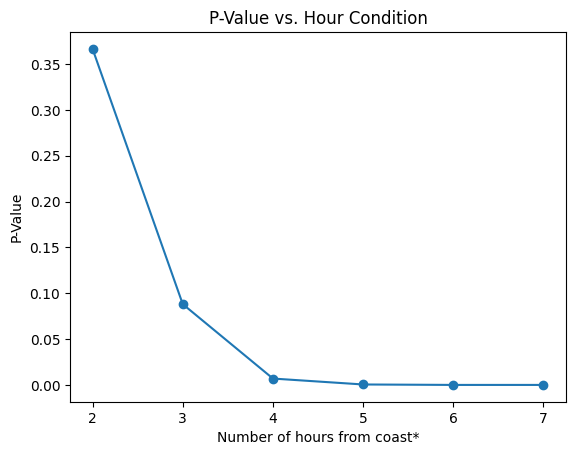

In [ ]:
distance_adjusted = data.copy()

# Divide the column values by the divisor in the new DataFrame
distance_adjusted["Distance_to_coast"] = distance_adjusted['Distance_to_coast'] / 105

# Define a range of hour_conditions
hour_conditions = np.arange(1, 8, 1)

# Lists to store results
p_values = []

# Loop through different hour_conditions
for hour_condition in hour_conditions:
    # Create two groups based on the condition
    less_than_condition = distance_adjusted[distance_adjusted["Distance_to_coast"] < hour_condition]
    greater_than_condition = distance_adjusted[distance_adjusted["Distance_to_coast"] >= hour_condition]

    # Perform t-test between the two groups
    t_statistic, p_value = ttest_ind(
        greater_than_condition['Median_House_Value'],
        less_than_condition['Median_House_Value'],
        equal_var=False)

    # Append p-value to the list
    p_values.append(p_value)

# Plot the results
plt.plot(hour_conditions, p_values, marker='o')
plt.xlabel('Number of hours from coast*')
plt.ylabel('P-Value')
plt.title('P-Value vs. Hour Condition')
plt.show()

We can see from around 3 and a half hours onwards, the distance from the coast does start to show signficant statsitcal sigifiance between median housing prices and distance from the coast.

# Train Test Split and Data Set Preperation

for the X variable, we need to drop the longitude and latitude features and the distance to LA, SF, SD and SJ as from the correlation heatmap we can see that they are not strongly correlated with the median housing value and therefore do not contribute meaningfully but rather add unncesscary noices for the algorithms to process.

In [ ]:
data["bedroom_ratio"] = data["Tot_Bedrooms"]/data['Tot_Rooms']
data["household_rooms"] = data["Tot_Rooms"]/data["Households"]

data["Distance_to_coast"] = data["Distance_to_coast"] * -1 # convert distance to coast to negative to the greater the distance the more negative or smaller that number will become.

In [ ]:
X = data.drop(['Median_House_Value'], axis = 1).drop(['Latitude'], axis = 1).drop(['Longitude'], axis = 1).drop(['Distance_to_LA'], axis = 1).drop(['Distance_to_SanDiego'], axis = 1).drop(['Distance_to_SanJose'], axis = 1).drop(['Distance_to_SanFrancisco'], axis = 1)
y = data['Median_House_Value']

Train, validation, test split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Train data (70%): {X_train.shape}, Validation data (15%):{X_val.shape}, Test data (15%):{X_test.shape}')

Train data (70%): (14448, 9), Validation data (15%):(3096, 9), Test data (15%):(3096, 9)


# Visualisation of the changes after incorperating the 2 new features and removing the unnecessary features.

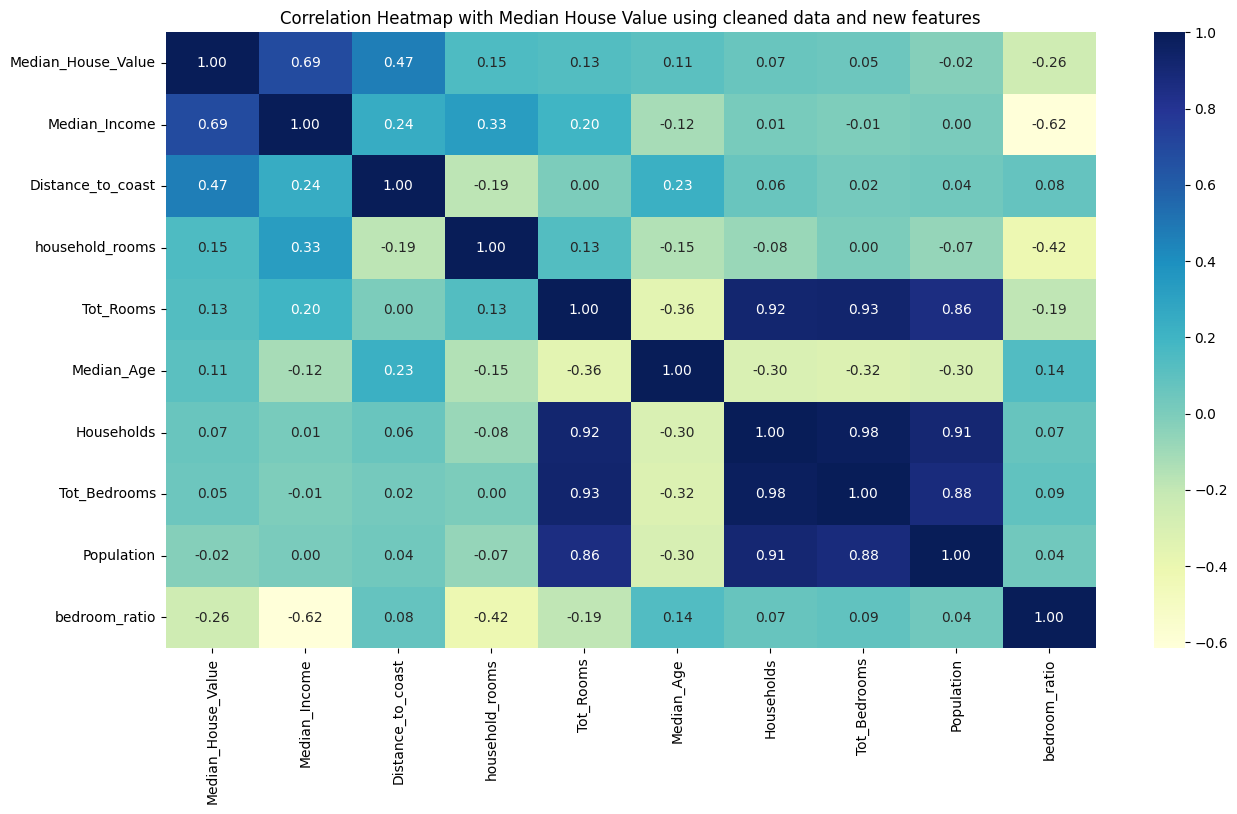

In [ ]:
clean_data = X.join(y)

correlation_matrix = clean_data.corr()

# Sort the correlation values with respect to "Median_House_Value"
sorted_correlation = correlation_matrix['Median_House_Value'].sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.heatmap(clean_data[sorted_correlation.index].corr(), annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Correlation Heatmap with Median House Value using cleaned data and new features')
plt.show()

# Model 1: Linear regression model

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_val_pred = reg.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate Mean Error and Percentage Error on Validation Set
mean_error_val = np.mean(y_val_pred - y_val)
mean_absolute_percentage_error_val = np.mean(np.abs((y_val_pred - y_val) / y_val)) * 100

print(f"Mean Error on Validation Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val}")
print(f"R-squared (R2) on Validation Set: {r2_val}")
print(f"Percentage Error on Validation Set: {mean_absolute_percentage_error_val}%\n")

# Predictions on Test Set
y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Error and Percentage Error on Test Set
mean_error_test = np.mean(y_test_pred - y_test)
mean_absolute_percentage_error_test = np.mean(np.abs((y_test_pred - y_test) / y_test)) * 100

print(f"Mean Error on Test Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"R-squared (R2) on Test Set: {r2_test}")
print(f"Percentage Error on Test Set: {mean_absolute_percentage_error_test}%")

Mean Error on Validation Set: 1083.702007486972
Mean Squared Error (MSE) on Validation Set: 5140623740.620904
R-squared (R2) on Validation Set: 0.6054075135435455
Percentage Error on Validation Set: 31.33037923255247%

Mean Error on Test Set: 1083.702007486972
Mean Squared Error (MSE) on Test Set: 4678164199.094114
R-squared (R2) on Test Set: 0.6462128616686338
Percentage Error on Test Set: 30.17574180836758%


# Model 1 continuted: Linear Regression Optimisation using ElasticNet

In [ ]:
# Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)
# found no signifinance difference using the standard scalar, most likely because data set is already fairly well scaled

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8],
}

# Initialize the ElasticNet model
enet_opt = ElasticNet(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(enet_opt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print(f'Best alpha: {best_alpha}, Best l1 ratio: {best_l1_ratio}\n')


# Fit the model with the best hyperparameters
best_enet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
best_enet.fit(X_train, y_train)

# Testing best enet accuracy
y_val_pred = best_enet.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate Mean Error and Percentage Error on Validation Set
mean_error_val = np.mean(y_val_pred - y_val)
mean_absolute_percentage_error_val = np.mean(np.abs((y_val_pred - y_val) / y_val)) * 100

print(f"Mean Error on Validation Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val}")
print(f"R-squared (R2) on Validation Set: {r2_val}")
print(f"Percentage Error on Validation Set: {mean_absolute_percentage_error_val}%\n")

# Predictions on Test Set
y_test_pred = best_enet.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Error and Percentage Error on Test Set
mean_error_test = np.mean(y_test_pred - y_test)
mean_absolute_percentage_error_test = np.mean(np.abs((y_test_pred - y_test) / y_test)) * 100

print(f"Mean Error on Test Set: {abs(mean_error_test)}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"R-squared (R2) on Test Set: {r2_test}")
print(f"Percentage Error on Test Set: {mean_absolute_percentage_error_test}%")

Best alpha: 0.1, Best l1 ratio: 0.8

Mean Error on Validation Set: 1090.0707636446568
Mean Squared Error (MSE) on Validation Set: 5255596799.849556
R-squared (R2) on Validation Set: 0.5965822215934564
Percentage Error on Validation Set: 31.819373121846073%

Mean Error on Test Set: 1090.0707636446568
Mean Squared Error (MSE) on Test Set: 4697134662.179483
R-squared (R2) on Test Set: 0.6447782164612053
Percentage Error on Test Set: 30.311699849754646%


# Additional Enet hyperperameter testing

In [ ]:
# Define a custom MAPE scoring function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make the MAPE function a scorer for GridSearchCV
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform grid search with cross-validation using MAPE as the scoring metric
grid_search = GridSearchCV(enet_opt, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train, y_train)

# Extract relevant information from cv_results_
cv_results_df = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
cv_results_df

,params,mean_test_score,std_test_score
0,"{'alpha': 0.1, 'l1_ratio': 0.2}",-31.031369,0.609888
1,"{'alpha': 0.1, 'l1_ratio': 0.5}",-30.941627,0.608648
2,"{'alpha': 0.1, 'l1_ratio': 0.8}",-30.828319,0.608507
3,"{'alpha': 0.5, 'l1_ratio': 0.2}",-31.930105,0.632442
4,"{'alpha': 0.5, 'l1_ratio': 0.5}",-31.510793,0.621039
5,"{'alpha': 0.5, 'l1_ratio': 0.8}",-31.088482,0.610984
6,"{'alpha': 1.0, 'l1_ratio': 0.2}",-32.983159,0.662238
7,"{'alpha': 1.0, 'l1_ratio': 0.5}",-32.205819,0.641285
8,"{'alpha': 1.0, 'l1_ratio': 0.8}",-31.371106,0.617433


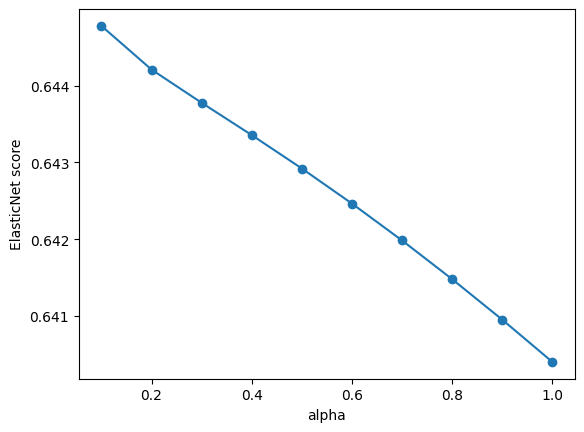

0.6404021815211576

In [ ]:
alpha = np.arange(0.1, 1.1, 0.1)
elastic_score = []

# Loop through different alpha levels
for a_value in alpha:
  enet = ElasticNet(alpha = a_value,l1_ratio= 0.8, random_state=42) # the value of alpha is initial value

  # Fit the model to the training data
  enet.fit(X_train, y_train)

  score = enet.score(X_test, y_test)
  elastic_score.append(score)

plt.plot(alpha, elastic_score, marker='o')
plt.xlabel('alpha')
plt.ylabel('ElasticNet score')
plt.show()
score

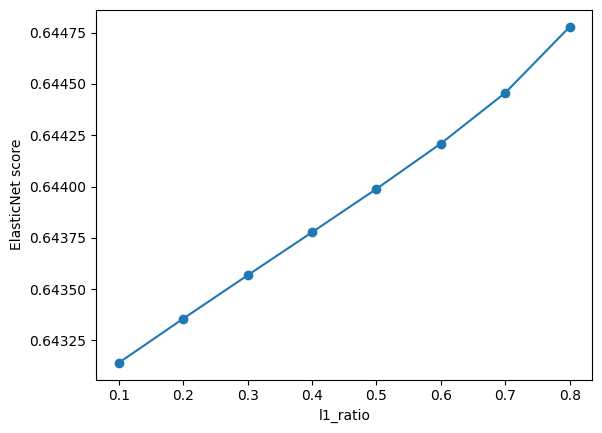

0.6447782164612053

In [ ]:
l1_ratio = np.arange(0.1, 0.9, 0.1)
elastic_score = []

# Loop through different l1_ratio values
for value in l1_ratio:
  enet = ElasticNet(alpha = 0.1,l1_ratio= value, random_state=42) # the value of alpha is initial value

  # Fit the model to the training data
  enet.fit(X_train, y_train)

  score = enet.score(X_test, y_test)
  elastic_score.append(score)

plt.plot(l1_ratio, elastic_score, marker='o')
plt.xlabel('l1_ratio')
plt.ylabel('ElasticNet score')
plt.show()
score

# Linear Regression vs ElasticNet model comparison

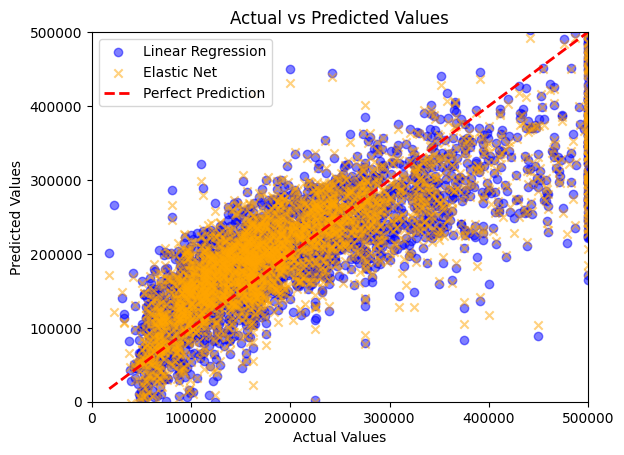

In [ ]:
y_pred_linear = reg.predict(X_test)
y_pred_enet = best_enet.predict(X_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5, marker='o', color='blue')
plt.scatter(y_test, y_pred_enet, label='Elastic Net', alpha=0.5, marker='x', color='orange')

# Plot a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Set axis limits to only show positive values starting from 0
plt.xlim(0, max(y_test))
plt.ylim(0, max(y_test))

plt.legend()
plt.show()

In [ ]:
y_test_pred_linear = reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_linear = r2_score(y_test, y_test_pred_linear)
variance_linear = np.var(y_test_pred_linear)
std_dev_linear = np.std(y_test_pred_linear)
mean_error_linear = np.mean(y_test_pred_linear - y_test)
mean_absolute_percentage_error_linear = np.mean(np.abs((y_test_pred_linear - y_test) / y_test)) * 100

# Elastic Net
y_test_pred_enet = best_enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_test_pred_enet)
r2_enet = r2_score(y_test, y_test_pred_enet)
variance_enet = np.var(y_test_pred_enet)
std_dev_enet = np.std(y_test_pred_enet)
mean_error_enet = np.mean(y_test_pred_enet - y_test)
mean_absolute_percentage_error_enet = np.mean(np.abs((y_test_pred_enet - y_test) / y_test)) * 100

# Create a DataFrame for comparison
enet_vs_lingreg = {
    'Model': ['Linear Regression Model', 'Best Elastic Net Model'],
    'Mean Error': [mean_error_linear, mean_error_enet],
    'MSE': [mse_linear, mse_enet],
    'R2': [r2_linear, r2_enet],
    'Variance': [variance_linear, variance_enet],
    'Std Dev': [std_dev_linear, std_dev_enet],
    'Mean Absolute Percentage Error': [mean_absolute_percentage_error_linear, mean_absolute_percentage_error_enet],
}

comparison_table = pd.DataFrame(enet_vs_lingreg)

# Display the table
comparison_table.head()

,Model,Mean Error,MSE,R2,Variance,Std Dev,Mean Absolute Percentage Error
0,Linear Regression Model,577.740160,4678164199.094114,0.646213,8464546876.436700,92002.972107,30.175742
1,Best Elastic Net Model,767.878990,4697134662.179483,0.644778,8258978589.170894,90878.922689,30.311700


# Random Forest Regressor

We used random forest regressor instead of classifier as we are dealing with continuous numerical data.


In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = forest.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate Mean Error and Percentage Error on Validation Set
mean_error_val = np.mean(y_val_pred - y_val)
mean_absolute_percentage_error_val = np.mean(np.abs((y_val_pred - y_val) / y_val)) * 100

print(f"Mean Error on Validation Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val}")
print(f"R-squared (R2) on Validation Set: {r2_val}")
print(f"Mean Absolute Percentage Error on Validation Set: {mean_absolute_percentage_error_val}%\n")

# Predictions on Test Set
y_test_pred = forest.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Error and Percentage Error on Test Set
mean_error_test = np.mean(y_test_pred - y_test)
mean_absolute_percentage_error_test = np.mean(np.abs((y_test_pred - y_test) / y_test)) * 100

print(f"Mean Error on Test Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"R-squared (R2) on Test Set: {r2_test}")
print(f"Mean Absolute Percentage Error on Test Set: {mean_absolute_percentage_error_test}%")

Mean Error on Validation Set: 354.50791666666765
Mean Squared Error (MSE) on Validation Set: 3846769854.2395964
R-squared (R2) on Validation Set: 0.7047232868619175
Mean Absolute Percentage Error on Validation Set: 24.53531804655114%

Mean Error on Test Set: 354.50791666666765
Mean Squared Error (MSE) on Test Set: 3444110448.5710464
R-squared (R2) on Test Set: 0.739538432632814
Mean Absolute Percentage Error on Test Set: 23.86073842888553%


Optimisation for random forest using paramter grid

In [ ]:
# Measure score through MAPE
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split':[2, 4],
    'max_depth':[None, 4, 8], # For this model, depth level 8 and 10 has no signficance diffrence in performance but lower runtime.
    'min_samples_leaf': [1, 2, 4]
}

# Define a custom MAPE scoring function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, scoring=mape_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


# Extract relevant information from cv_results_
cv_results_df = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
cv_results_df


,params,mean_test_score,std_test_score
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-23.984303,0.481950
1,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-23.918053,0.492939
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-23.860441,0.472994
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-23.951286,0.502999
4,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-23.879079,0.485786
5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-23.935036,0.469382
6,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-23.770596,0.430033
7,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-23.734573,0.421555
8,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-23.706680,0.444873
9,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-23.782130,0.463571


In [ ]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
best_forest = grid_search.best_estimator_
print(best_forest)

RandomForestRegressor(min_samples_leaf=4, n_estimators=300)


In [ ]:
# derivied from results of paramter grid. If possible do not use the paramter grid, the runtime was approx 50 minutes
# best_forest = RandomForestRegressor(min_samples_leaf=4, n_estimators=300, max_depth=10)
# best_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=300)

In [ ]:
# Make predictions on the validation set
y_val_pred = best_forest.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate Mean Error and Percentage Error on Validation Set
mean_error_val = np.mean(y_val_pred - y_val)
mean_absolute_percentage_error_val = np.mean((np.abs(y_val_pred - y_val) / y_val)) * 100

print(f"Mean Error on Validation Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse_val}")
print(f"R-squared (R2) on Validation Set: {r2_val}")
print(f"Mean Absolute Percentage Error on Validation Set: {mean_absolute_percentage_error_val}%\n")

# Predictions on Test Set
y_test_pred = best_forest.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Error and Percentage Error on Test Set
mean_error_test = np.mean(y_test_pred - y_test)
mean_absolute_percentage_error_test = np.mean(np.abs((y_test_pred - y_test) / y_test)) * 100

print(f"Mean Error on Test Set: {abs(mean_error_val)}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"R-squared (R2) on Test Set: {r2_test}")
print(f"Mean Absolute Percentage Error on Test Set: {mean_absolute_percentage_error_test}%")

Mean Error on Validation Set: 662.2848218491439
Mean Squared Error (MSE) on Validation Set: 4100654138.4323244
R-squared (R2) on Validation Set: 0.6852352177040442
Mean Absolute Percentage Error on Validation Set: 25.350898121427313%

Mean Error on Test Set: 662.2848218491439
Mean Squared Error (MSE) on Test Set: 3591120549.7780485
R-squared (R2) on Test Set: 0.728420763222685
Mean Absolute Percentage Error on Test Set: 24.566096788373002%


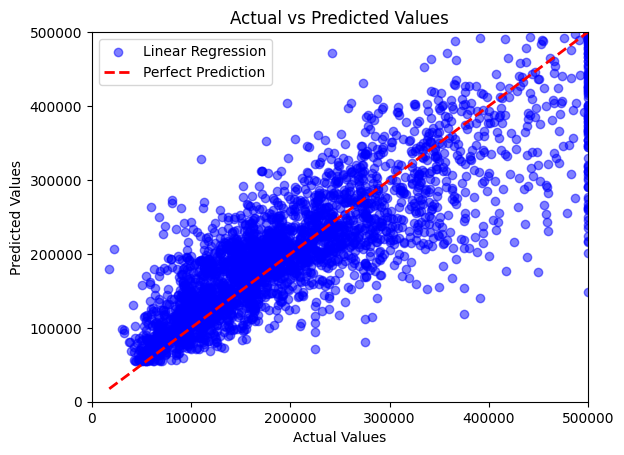

In [ ]:
y_pred_forest = best_forest.predict(X_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_forest, label='Linear Regression', alpha=0.5, marker='o', color='blue')

# Plot a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Set axis limits to only show positive values starting from 0
plt.xlim(0, max(y_test))
plt.ylim(0, max(y_test))

plt.legend()
plt.show()

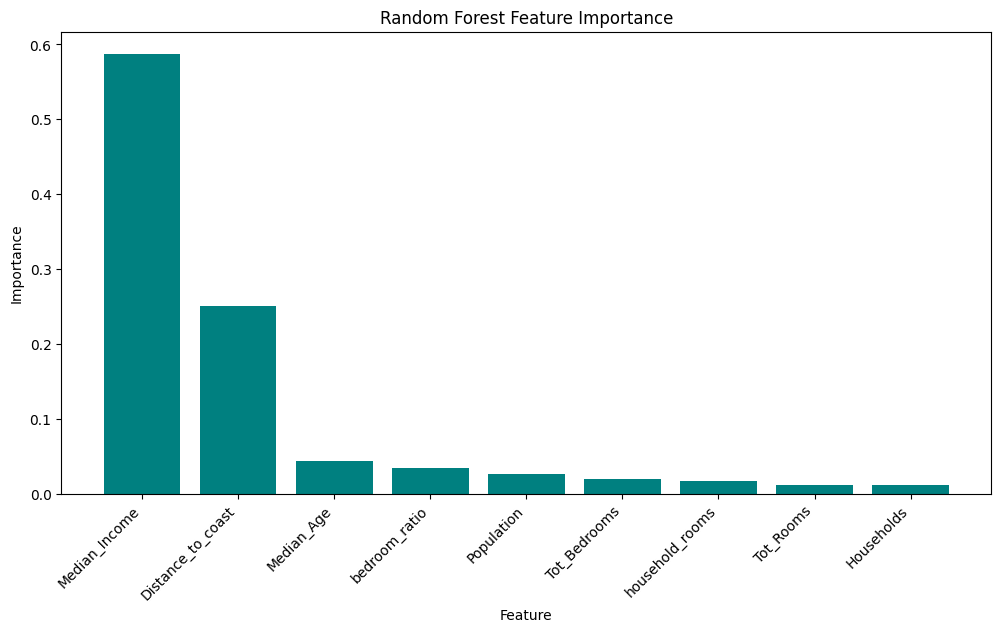

In [ ]:
feature_importances = best_forest.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# Additional Random Forest hyperparameter testing

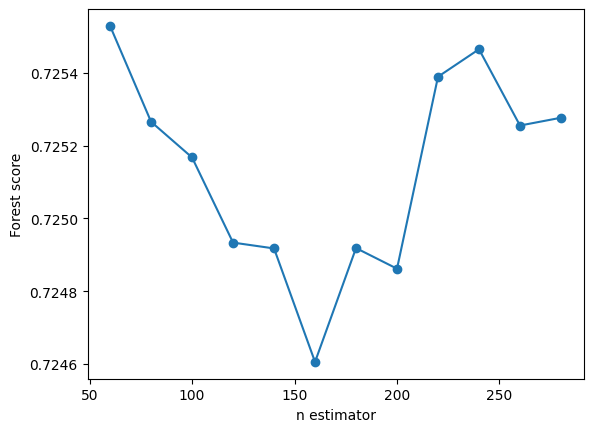

0.7252767961551938

In [ ]:
n_estimator = np.arange(60, 300, 20)
forest_score = []

# Loop through different hour_conditions
for n_estimator_value in n_estimator:
  forest = RandomForestRegressor(n_estimators= n_estimator_value,  # Number of trees in the forest
                                max_depth= 10,      # Maximum depth of the tree
                                min_samples_split=2,  # Minimum number of samples required to split an internal node
                                min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                                random_state=42)     # Seed for reproducibility

  # Fit the model to the training data
  forest.fit(X_train, y_train)

  score = forest.score(X_test, y_test)
  forest_score.append(score)

plt.plot(n_estimator, forest_score, marker='o')
plt.xlabel('n estimator')
plt.ylabel('Forest score')
plt.show() # most optimal n estimator 140
score

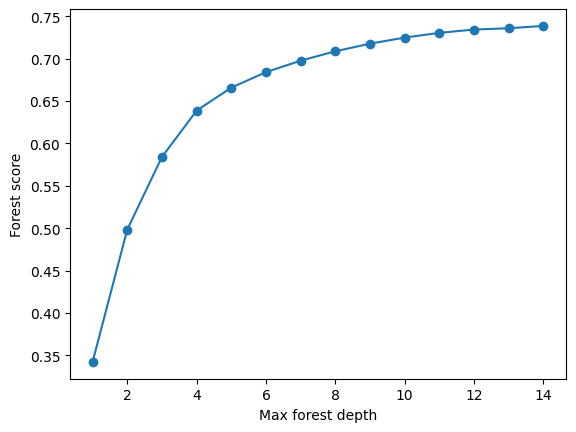

0.7386738912473212

In [ ]:
max_depth_value = np.arange(1, 15, 1) # about 3 minutes 12 sec runtime for (1, 20, 1), about 4 minutes 42 sec runtime for (1, 25, 1)
forest_score = []

# Loop through different hour_conditions
for max_depth in max_depth_value:
  forest = RandomForestRegressor(n_estimators= 140,  # Number of trees in the forest
                                max_depth= max_depth,      # Maximum depth of the tree
                                min_samples_split=2,  # Minimum number of samples required to split an internal node
                                min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                                random_state=42)     # Seed for reproducibility

  # Fit the model to the training data
  forest.fit(X_train, y_train)

  score = forest.score(X_test, y_test)
  forest_score.append(score)

plt.plot(max_depth_value, forest_score, marker='o')
plt.xlabel('Max forest depth')
plt.ylabel('Forest score')
plt.show()
score


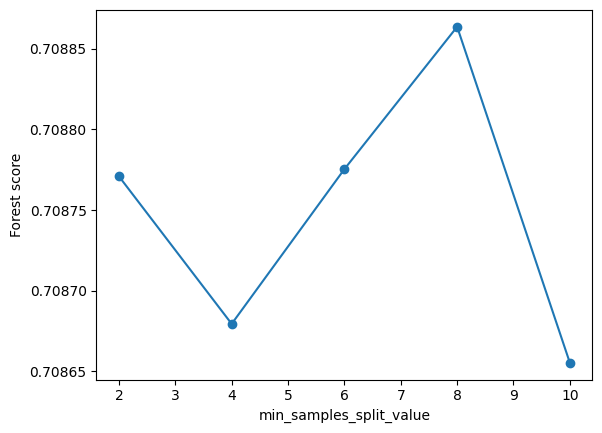

0.7086552569303315

In [ ]:
min_samples_splits = np.arange(2, 12, 2) # about 3 minutes 12 sec runtime for (1, 20, 1), about 4 minutes 42 sec runtime for (1, 25, 1)
forest_score = []

# Loop through different hour_conditions
for min_samples_split_value in min_samples_splits:
  forest = RandomForestRegressor(n_estimators= 100,  # Number of trees in the forest
                                max_depth= 8,      # Maximum depth of the tree
                                min_samples_split= min_samples_split_value,  # Minimum number of samples required to split an internal node
                                min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                                random_state=42)     # Seed for reproducibility

  # Fit the model to the training data
  forest.fit(X_train, y_train)

  score = forest.score(X_test, y_test)
  forest_score.append(score)

plt.plot(min_samples_splits, forest_score, marker='o')
plt.xlabel('min_samples_split_value')
plt.ylabel('Forest score')
plt.show()
score

# Comparison between Linear Regression and Best Elasticnet and Random forest model

In [ ]:
# Linear Regression
y_test_pred_linear = reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_linear = r2_score(y_test, y_test_pred_linear)
variance_linear = np.var(y_test_pred_linear)
std_dev_linear = np.std(y_test_pred_linear)
mean_error_linear = np.mean(y_test_pred_linear - y_test)
mean_absolute_percentage_error_linear = np.mean(np.abs((y_test_pred_linear - y_test) / y_test)) * 100

# Elastic Net
y_test_pred_enet = best_enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_test_pred_enet)
r2_enet = r2_score(y_test, y_test_pred_enet)
variance_enet = np.var(y_test_pred_enet)
std_dev_enet = np.std(y_test_pred_enet)
mean_error_enet = np.mean(y_test_pred_enet - y_test)
mean_absolute_percentage_error_enet = np.mean(np.abs((y_test_pred_enet - y_test) / y_test)) * 100

# Random Forest
y_test_pred_forest = best_forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_test_pred_forest)
r2_forest = r2_score(y_test, y_test_pred_forest)
variance_forest = np.var(y_test_pred_forest)
std_dev_forest = np.std(y_test_pred_forest)
mean_error_forest = np.mean(y_test_pred_forest - y_test)
mean_absolute_percentage_error_forest = np.mean(np.abs((y_test_pred_forest - y_test) / y_test)) * 100


# Create a DataFrame for comparison
enetvslinregvsrandomforest = {
    'Model': ['Linear Regression Model', 'Best Elastic Net Model', 'Best Random Forest Model'],
    'Mean Error': [mean_error_linear, mean_error_enet, mean_error_forest],
    'Mean Squared Error': [mse_linear, mse_enet, mse_forest],
    'R2': [r2_linear, r2_enet, r2_forest],
    'Variance': [variance_linear, variance_enet, variance_forest],
    'Std Dev': [std_dev_linear, std_dev_enet, std_dev_forest],
    'Mean Absolute Percentage Error': [mean_absolute_percentage_error_linear, mean_absolute_percentage_error_enet, mean_absolute_percentage_error_forest],
}

comparison_table = pd.DataFrame(enetvslinregvsrandomforest)

# Display the table
comparison_table.head()

,Model,Mean Error,Mean Squared Error,R2,Variance,Std Dev,Mean Absolute Percentage Error
0,Linear Regression Model,577.740160,4678164199.094114,0.646213,8464546876.436700,92002.972107,30.175742
1,Best Elastic Net Model,767.878990,4697134662.179483,0.644778,8258978589.170894,90878.922689,30.311700
2,Best Random Forest Model,1656.990837,3591120549.778049,0.728421,9302288071.547421,96448.369979,24.566097


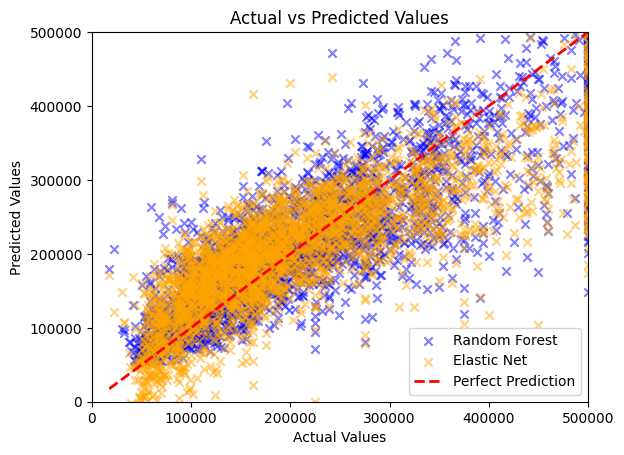

In [ ]:
y_pred_enet = best_enet.predict(X_test)
y_pred_forest = best_forest.predict(X_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_forest, label='Random Forest', alpha=0.5, marker='x', color='blue')
plt.scatter(y_test, y_pred_enet, label='Elastic Net', alpha=0.5, marker='x', color='orange')


# Plot a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Set axis limits to only show positive values starting from 0
plt.xlim(0, max(y_test))
plt.ylim(0, max(y_test))

plt.legend()
plt.show()